# 问题收集

In [ ]:


ModuleNotFoundError: No module named 'mmcv._ext'

RuntimeError: unexpected EOF, expected 9359235 more bytes. The file might be corrupted.


OSError: /work_dirs/D2Det_detection_r50_fpn_2x/epoch_392.pth is not a checkpoint file
:有可能是路径不对最大可能在第一个/， ./
    
标准：work_dirs/D2Det_detection_r50_fpn_2x/epoch_392.pth

-------------------trian--------------------
python tools/train.py configs/d2det/D2Det_detection_r50_fpn_2x.py

python tools/train.py configs/retinanet/retinanet_r50_fpn_1x_coco.py


python tools/train.py configs/ssd/ssd512_coco.py --work_dir ssd512_mm


--------------------test--------------------
python tools/test.py configs/d2det/D2Det_detection_r50_fpn_2x.py work_dirs/D2Det_detection_r50_fpn_2x/latest.pth --out out/aver.pkl --eval bbox --show

python tools/test.py ./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py checkpoints/latest.pth  --out out/aver.pkl --eval bbox --show


-----------------迁移修改--------------------
mmdet/core/evaluation/class_names.py  类别
mmdet/datasets/coco.py   类别
D2Det_detection_r50_fpn_2x.py  类别数  
default_runtime.py   保存checkpoints的epochs数
coco_detection.py   输入图片尺寸
schedule_1x.py   训练总共epochs
pip install -v -e .



KeyError: 'ConvWS is already registered in conv layer'  原因是升级了mmcv版本    pip install mmcv==0.6.2

# 版本查看与匹配问题

In [2]:
#mmdet与mmcv-full 的匹配问题

#不推荐使用mmcv  而使用mmcv-full

#常用查看方法 conda list 


# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version  #indicate mmcv install successfully
print(get_compiling_cuda_version())
print(get_compiler_version())


SyntaxError: invalid syntax (<ipython-input-2-4b99ca8d465b>, line 1)

In [ ]:
mmdet/models/detectors/base.py中   修改边界框显示风格

In [2]:
三个测试基准：mmdetection、Detectron、maskrcnn-benchmark

mmdetection与Detectron相比具有3个优势 ：
1）更高的性能（尤其是在掩模AP方面）
2）训练速度更快
3）高效记忆

SyntaxError: invalid character in identifier (<ipython-input-2-da30c29506ba>, line 1)

# MMDetection and MMCV

In [ ]:
mmdetection依赖cuda、mmcv、Cython、PyTorch、torvision：

(1). cuda：想要编译mmdetection必须在本机上安装有cuda，支持在一块GPU或多块GPU上运行，支持的cuda版本包括8.0, 9.0, 10.0；

(2). mmcv：是基础库也是open-mmlab项目的一部分，主要分为两个部分：一部分是和 deep learning framework无关的一些工具函数，
比如 IO/Image/Video相关的一些操作；另一部分是为PyTorch写的一套训练工具，可以大大减少用户需要写的代码量，
同时让整个流程的定制变得容易。mmcv仅有python的实现，它依赖numpy, pyyaml, six, addict, requests, opencv-python；

(3). Cython：python库，利用python类似的语法达到接近C语言的运行速度；

(4). PyTorch：由facebook开源的深度学习框架，对外提供python和C++等接口，可编译于windows, linux, mac平台：

主要模块组成：

aten：底层tensor库；

c10：后端库，无依赖；

caffe2：一种新的轻量级、模块化和可扩展的深度学习框架；

torch：一个科学计算框架，支持很多机器学习算法；

modules：caffe2额外实现的layer；

third party：pytorch支持许多第三方库扩展，如FBGEMM、MIOpen、MKL-DNN、NNPACK、ProtoBuf、
FFmpeg、NCCL、OpenCV、SNPE、Eigen、TensorRT、ONNX等。

(5). torvision：支持流行的数据集load, 模型架构和通用的计算机视觉的图像操作，依赖PIL和torch。
支持的图像操作包括归一化、缩放、pad、剪切、flip、旋转、仿射变换等；支持的模型架构包括
alexnet, densenet, inception, resnet, squeezenet, vgg；
支持的数据集包括mnist, cifar, coco, cityscapes, fakedata, stl10。

### 从零开始安装脚本

In [ ]:
conda create -n open-mmlab python=3.7 -y
conda activate open-mmlab

conda install -c pytorch pytorch torchvision -y
conda install cython -y
git clone https://github.com/open-mmlab/mmdetection.git
cd mmdetection
pip install -v -e .

mkdir data
ln -s $COCO_ROOT data





环境搭建教程：
https://my.oschina.net/u/4255345/blog/4479437

In [ ]:
#单GPU训练
python tools/train.py ${CONFIG_FILE}

python tools/train.py chongqing_tainchi/cascade_rcnn_r50_fpn_1x.py

In [ ]:
# single-gpu testing 单GPU测试
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}] [--eval ${EVAL_METRICS}] [--show]

    测试Faster R-CNN并显示结果
    eg:python tools/test.py configs/faster_rcnn_r50_fpn_1x.py \
    checkpoints/faster_rcnn_r50_fpn_1x_20181010-3d1b3351.pth \
    --out out/resule.pkl --eval bbox --show
        
    测试Mask R-CNN并评估bbox和mask AP  
    eg:python tools/test.py configs/mask_rcnn_r50_fpn_1x.py \
    checkpoints/mask_rcnn_r50_fpn_1x_20181010-069fa190.pth \
    --out results.pkl --eval bbox segm

###### 网络摄像头演示

In [ ]:
python demo/webcam_demo.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--device ${GPU_ID}] [--camera-id ${CAMERA-ID}] [--score-thr ${SCORE_THR}]

python demo/webcam_demo.py configs/faster_rcnn_r50_fpn_1x.py \
    checkpoints/faster_rcnn_r50_fpn_1x_20181010-3d1b3351.pth

##### 分析日志

In [ ]:
python tools/analyze_logs.py plot_curve [--keys ${KEYS}] [--title ${TITLE}] [--legend ${LEGEND}] [--backend ${BACKEND}] [--style ${STYLE}] [--out ${OUT_FILE}]
绘制分类损失
python tools/analyze_logs.py plot_curve log.json --keys loss_cls --legend loss_cls
绘制分类和回归损失  并保存为pdf
python tools/analyze_logs.py plot_curve log.json --keys loss_cls loss_reg --out losses.pdf
比较同一图中两次运行的bbox mAP
python tools/analyze_logs.py plot_curve log1.json log2.json --keys bbox_mAP --legend run1 run2
计算平均训练速度
python tools/analyze_logs.py cal_train_time ${CONFIG_FILE} [--include-outliers]
分析基于类的mAP，以更全面地了解该模型
python coco_eval.py ${RESULT} --ann ${ANNOTATION_PATH} --types bbox --classwise
计算给定模型的FLOP和参数
python tools/get_flops.py ${CONFIG_FILE} [--shape ${INPUT_SHAPE}]

In [ ]:
压缩一个模型—publish_model.py压缩模型
python tools/publish_model.py ${INPUT_FILENAME} ${OUTPUT_FILENAME}
    eg:python tools/publish_model.py work_dirs/faster_rcnn/latest.pth faster_rcnn_r50_fpn_1x_20190801.pth
测试检测器的健壮性
ROBUSTNESS_BENCHMARKING.md

# 使用自己的数据集

In [4]:
%run tools/print_config.py ./configs/d2det/D2Det_detection_r50_fpn_2x.py

Config:
dataset_type = 'CocoDataset'
data_root = 'data/coco/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[123.675, 116.2

# 参数解读

##### {model}_[model setting]_{backbone}_{neck}_[norm setting]_[misc]_[gpu x batch_per_gpu]_{schedule}_{dataset}

In [ ]:
{model}：faster_rcnn, mask_rcnn, retinanet, d2det

In [ ]:
[model setting]

In [ ]:
{backbone}:r50, x101

In [ ]:
{neck}:fpn, pafpn, nasfpn, c4

In [ ]:
[norm setting]:bn, gn, gn-head(将gn用于head部分), gn-neck, an-all

In [ ]:
[misc]:dconv, gcb, attention, albu, mstrain

In [ ]:
[gpu x batch_per_gpu]:8x2(8张GPU，每张的batch为2),单GPU时，lr/8

In [ ]:
{schedule}：1x, 2x, 20e（just for cascade）

In [ ]:
{dataset}:coco, voc0712, wider-face, citycapes

##### 注释解读

In [ ]:
model = dict(
    type='MaskRCNN',  # The name of detector
    pretrained=
    'torchvision://resnet50',  # The ImageNet pretrained backbone to be loaded
    backbone=dict(  # The config of backbone
        type='ResNet',  # The type of the backbone, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/backbones/resnet.py#L288 for more details.
        depth=50,  # The depth of backbone, usually it is 50 or 101 for ResNet and ResNext backbones.
        num_stages=4,  # Number of stages of the backbone.
        out_indices=(0, 1, 2, 3),  # The index of output feature maps produced in each stages
        frozen_stages=1,  # The weights in the first 1 stage are fronzen
        norm_cfg=dict(  # The config of normalization layers.
            type='BN',  # Type of norm layer, usually it is BN or GN
            requires_grad=True),  # Whether to train the gamma and beta in BN
        norm_eval=True,  # Whether to freeze the statistics in BN
        style='pytorch'),  # The style of backbone, 'pytorch' means that stride 2 layers are in 3x3 conv, 'caffe' means stride 2 layers are in 1x1 convs.
    neck=dict(
        type='FPN',  # The neck of detector is FPN. We also support 'NASFPN', 'PAFPN', etc. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/necks/fpn.py#L10 for more details.
        in_channels=[256, 512, 1024, 2048],  # The input channels, this is consistent with the output channels of backbone
        out_channels=256,  # The output channels of each level of the pyramid feature map
        num_outs=5),  # The number of output scales
    rpn_head=dict(
        type='RPNHead',  # The type of RPN head is 'RPNHead', we also support 'GARPNHead', etc. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/dense_heads/rpn_head.py#L12 for more details.
        in_channels=256,  # The input channels of each input feature map, this is consistent with the output channels of neck
        feat_channels=256,  # Feature channels of convolutional layers in the head.
        anchor_generator=dict(  # The config of anchor generator
            type='AnchorGenerator',  # Most of methods use AnchorGenerator, SSD Detectors uses `SSDAnchorGenerator`. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/anchor/anchor_generator.py#L10 for more details
            scales=[8],  # Basic scale of the anchor, the area of the anchor in one position of a feature map will be scale * base_sizes
            ratios=[0.5, 1.0, 2.0],  # The ratio between height and width.
            strides=[4, 8, 16, 32, 64]),  # The strides of the anchor generator. This is consistent with the FPN feature strides. The strides will be taken as base_sizes if base_sizes is not set.
        bbox_coder=dict(  # Config of box coder to encode and decode the boxes during training and testing
            type='DeltaXYWHBBoxCoder',  # Type of box coder. 'DeltaXYWHBBoxCoder' is applied for most of methods. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/bbox/coder/delta_xywh_bbox_coder.py#L9 for more details.
            target_means=[0.0, 0.0, 0.0, 0.0],  # The target means used to encode and decode boxes
            target_stds=[1.0, 1.0, 1.0, 1.0]),  # The standard variance used to encode and decode boxes
        loss_cls=dict(  # Config of loss function for the classification branch
            type='CrossEntropyLoss',  # Type of loss for classification branch, we also support FocalLoss etc.
            use_sigmoid=True,  # RPN usually perform two-class classification, so it usually uses sigmoid function.
            loss_weight=1.0),  # Loss weight of the classification branch.
        loss_bbox=dict(  # Config of loss function for the regression branch.
            type='L1Loss',  # Type of loss, we also support many IoU Losses and smooth L1-loss, etc. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/losses/smooth_l1_loss.py#L56 for implementation.
            loss_weight=1.0)),  # Loss weight of the regression branch.
    roi_head=dict(  # RoIHead encapsulates the second stage of two-stage/cascade detectors.
        type='StandardRoIHead',  # Type of the RoI head. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/roi_heads/standard_roi_head.py#L10 for implementation.
        bbox_roi_extractor=dict(  # RoI feature extractor for bbox regression.
            type='SingleRoIExtractor',  # Type of the RoI feature extractor, most of methods uses SingleRoIExtractor. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/roi_heads/roi_extractors/single_level.py#L10 for details.
            roi_layer=dict(  # Config of RoI Layer
                type='RoIAlign',  # Type of RoI Layer, DeformRoIPoolingPack and ModulatedDeformRoIPoolingPack are also supported. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/ops/roi_align/roi_align.py#L79 for details.
                output_size=7,  # The output size of feature maps.
                sampling_ratio=0),  # Sampling ratio when extracting the RoI features. 0 means adaptive ratio.
            out_channels=256,  # output channels of the extracted feature.
            featmap_strides=[4, 8, 16, 32]),  # Strides of multi-scale feature maps. It should be consistent to the architecture of the backbone.
        bbox_head=dict(  # Config of box head in the RoIHead.
            type='Shared2FCBBoxHead',  # Type of the bbox head, Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/roi_heads/bbox_heads/convfc_bbox_head.py#L177 for implementation details.
            in_channels=256,  # Input channels for bbox head. This is consistent with the out_channels in roi_extractor
            fc_out_channels=1024,  # Output feature channels of FC layers.
            roi_feat_size=7,  # Size of RoI features
            num_classes=80,  # Number of classes for classification
            bbox_coder=dict(  # Box coder used in the second stage.
                type='DeltaXYWHBBoxCoder',  # Type of box coder. 'DeltaXYWHBBoxCoder' is applied for most of methods.
                target_means=[0.0, 0.0, 0.0, 0.0],  # Means used to encode and decode box
                target_stds=[0.1, 0.1, 0.2, 0.2]),  # Standard variance for encoding and decoding. It is smaller since the boxes are more accurate. [0.1, 0.1, 0.2, 0.2] is a conventional setting.
            reg_class_agnostic=False,  # Whether the regression is class agnostic.
            loss_cls=dict(  # Config of loss function for the classification branch
                type='CrossEntropyLoss',  # Type of loss for classification branch, we also support FocalLoss etc.
                use_sigmoid=False,  # Whether to use sigmoid.
                loss_weight=1.0),  # Loss weight of the classification branch.
            loss_bbox=dict(  # Config of loss function for the regression branch.
                type='L1Loss',  # Type of loss, we also support many IoU Losses and smooth L1-loss, etc.
                loss_weight=1.0)),  # Loss weight of the regression branch.
        mask_roi_extractor=dict(  # RoI feature extractor for bbox regression.
            type='SingleRoIExtractor',  # Type of the RoI feature extractor, most of methods uses SingleRoIExtractor.
            roi_layer=dict(  # Config of RoI Layer that extracts features for instance segmentation
                type='RoIAlign',  # Type of RoI Layer, DeformRoIPoolingPack and ModulatedDeformRoIPoolingPack are also supported
                output_size=14,  # The output size of feature maps.
                sampling_ratio=0),  # Sampling ratio when extracting the RoI features.
            out_channels=256,  # Output channels of the extracted feature.
            featmap_strides=[4, 8, 16, 32]),  # Strides of multi-scale feature maps.
        mask_head=dict(  # Mask prediction head
            type='FCNMaskHead',  # Type of mask head, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py#L21 for implementation details.
            num_convs=4,  # Number of convolutional layers in mask head.
            in_channels=256,  # Input channels, should be consistent with the output channels of mask roi extractor.
            conv_out_channels=256,  # Output channels of the convolutional layer.
            num_classes=80,  # Number of class to be segmented.
            loss_mask=dict(  # Config of loss function for the mask branch.
                type='CrossEntropyLoss',  # Type of loss used for segmentation
                use_mask=True,  # Whether to only train the mask in the correct class.
                loss_weight=1.0))))  # Loss weight of mask branch.
train_cfg = dict(  # Config of training hyperparameters for rpn and rcnn
    rpn=dict(  # Training config of rpn
        assigner=dict(  # Config of assigner
            type='MaxIoUAssigner',  # Type of assigner, MaxIoUAssigner is used for many common detectors. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/bbox/assigners/max_iou_assigner.py#L10 for more details.
            pos_iou_thr=0.7,  # IoU >= threshold 0.7 will be taken as positive samples
            neg_iou_thr=0.3,  # IoU < threshold 0.3 will be taken as negative samples
            min_pos_iou=0.3,  # The minimal IoU threshold to take boxes as positive samples
            match_low_quality=True,  # Whether to match the boxes under low quality (see API doc for more details).
            ignore_iof_thr=-1),  # IoF threshold for ignoring bboxes
        sampler=dict(  # Config of positive/negative sampler
            type='RandomSampler',  # Type of sampler, PseudoSampler and other samplers are also supported. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/bbox/samplers/random_sampler.py#L8 for implementation details.
            num=256,  # Number of samples
            pos_fraction=0.5,  # The ratio of positive samples in the total samples.
            neg_pos_ub=-1,  # The upper bound of negative samples based on the number of positive samples.
            add_gt_as_proposals=False),  # Whether add GT as proposals after sampling.
        allowed_border=-1,  # The border allowed after padding for valid anchors.
        pos_weight=-1,  # The weight of positive samples during training.
        debug=False),  # Whether to set the debug mode
    rpn_proposal=dict(  # The config to generate proposals during training
        nms_across_levels=False,  # Whether to do NMS for boxes across levels
        nms_pre=2000,  # The number of boxes before NMS
        nms_post=1000,  # The number of boxes to be kept by NMS
        max_num=1000,  # The number of boxes to be used after NMS
        nms_thr=0.7,  # The threshold to be used during NMS
        min_bbox_size=0),  # The allowed minimal box size
    rcnn=dict(  # The config for the roi heads.
        assigner=dict(  # Config of assigner for second stage, this is different for that in rpn
            type='MaxIoUAssigner',  # Type of assigner, MaxIoUAssigner is used for all roi_heads for now. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/bbox/assigners/max_iou_assigner.py#L10 for more details.
            pos_iou_thr=0.5,  # IoU >= threshold 0.5 will be taken as positive samples
            neg_iou_thr=0.5,  # IoU >= threshold 0.5 will be taken as positive samples
            min_pos_iou=0.5,  # The minimal IoU threshold to take boxes as positive samples
            match_low_quality=False,  # Whether to match the boxes under low quality (see API doc for more details).
            ignore_iof_thr=-1),  # IoF threshold for ignoring bboxes
        sampler=dict(
            type='RandomSampler',  # Type of sampler, PseudoSampler and other samplers are also supported. Refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/bbox/samplers/random_sampler.py#L8 for implementation details.
            num=512,  # Number of samples
            pos_fraction=0.25,  # The ratio of positive samples in the total samples.
            neg_pos_ub=-1,  # The upper bound of negative samples based on the number of positive samples.
            add_gt_as_proposals=True
        ),  # Whether add GT as proposals after sampling.
        mask_size=28,  # Size of mask
        pos_weight=-1,  # The weight of positive samples during training.
        debug=False))  # Whether to set the debug mode
test_cfg = dict(  # Config for testing hyperparameters for rpn and rcnn
    rpn=dict(  # The config to generate proposals during testing
        nms_across_levels=False,  # Whether to do NMS for boxes across levels
        nms_pre=1000,  # The number of boxes before NMS
        nms_post=1000,  # The number of boxes to be kept by NMS
        max_num=1000,  # The number of boxes to be used after NMS
        nms_thr=0.7,  # The threshold to be used during NMS
        min_bbox_size=0),  # The allowed minimal box size
    rcnn=dict(  # The config for the roi heads.
        score_thr=0.05,  # Threshold to filter out boxes
        nms=dict(  # Config of nms in the second stage
            type='nms',  # Type of nms
            iou_thr=0.5),  # NMS threshold
        max_per_img=100,  # Max number of detections of each image
        mask_thr_binary=0.5))  # Threshold of mask prediction
dataset_type = 'CocoDataset'  # Dataset type, this will be used to define the dataset
data_root = 'data/coco/'  # Root path of data
img_norm_cfg = dict(  # Image normalization config to normalize the input images
    mean=[123.675, 116.28, 103.53],  # Mean values used to pre-training the pre-trained backbone models
    std=[58.395, 57.12, 57.375],  # Standard variance used to pre-training the pre-trained backbone models
    to_rgb=True
)  # The channel orders of image used to pre-training the pre-trained backbone models
train_pipeline = [  # Training pipeline
    dict(type='LoadImageFromFile'),  # First pipeline to load images from file path
    dict(
        type='LoadAnnotations',  # Second pipeline to load annotations for current image
        with_bbox=True,  # Whether to use bounding box, True for detection
        with_mask=True,  # Whether to use instance mask, True for instance segmentation
        poly2mask=False),  # Whether to convert the polygon mask to instance mask, set False for acceleration and to save memory
    dict(
        type='Resize',  # Augmentation pipeline that resize the images and their annotations
        img_scale=(1333, 800),  # The largest scale of image
        keep_ratio=True
    ),  # whether to keep the ratio between height and width.
    dict(
        type='RandomFlip',  # Augmentation pipeline that flip the images and their annotations
        flip_ratio=0.5),  # The ratio or probability to flip
    dict(
        type='Normalize',  # Augmentation pipeline that normalize the input images
        mean=[123.675, 116.28, 103.53],  # These keys are the same of img_norm_cfg since the
        std=[58.395, 57.12, 57.375],  # keys of img_norm_cfg are used here as arguments
        to_rgb=True),
    dict(
        type='Pad',  # Padding config
        size_divisor=32),  # The number the padded images should be divisible
    dict(type='DefaultFormatBundle'),  # Default format bundle to gather data in the pipeline
    dict(
        type='Collect',  # Pipeline that decides which keys in the data should be passed to the detector
        keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),  # First pipeline to load images from file path
    dict(
        type='MultiScaleFlipAug',  # An encapsulation that encapsulates the testing augmentations
        img_scale=(1333, 800),  # Decides the largest scale for testing, used for the Resize pipeline
        flip=False,  # Whether to flip images during testing
        transforms=[
            dict(type='Resize',  # Use resize augmentation
                 keep_ratio=True),  # Whether to keep the ratio between height and width, the img_scale set here will be supressed by the img_scale set above.
            dict(type='RandomFlip'),  # Thought RandomFlip is added in pipeline, it is not used because flip=False
            dict(
                type='Normalize',  # Normalization config, the values are from img_norm_cfg
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(
                type='Pad',  # Padding config to pad images divisable by 32.
                size_divisor=32),
            dict(
                type='ImageToTensor',  # convert image to tensor
                keys=['img']),
            dict(
                type='Collect',  # Collect pipeline that collect necessary keys for testing.
                keys=['img'])
        ])
]
data = dict(
    samples_per_gpu=2,  # Batch size of a single GPU
    workers_per_gpu=2,  # Worker to pre-fetch data for each single GPU
    train=dict(  # Train dataset config
        type='CocoDataset',  # Type of dataset, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/coco.py#L19 for details.
        ann_file='data/coco/annotations/instances_train2017.json',  # Path of annotation file
        img_prefix='data/coco/train2017/',  # Prefix of image path
        pipeline=[  # pipeline, this is passed by the train_pipeline created before.
            dict(type='LoadImageFromFile'),
            dict(
                type='LoadAnnotations',
                with_bbox=True,
                with_mask=True,
                poly2mask=False),
            dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
            dict(type='RandomFlip', flip_ratio=0.5),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='DefaultFormatBundle'),
            dict(
                type='Collect',
                keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'])
        ]),
    val=dict(  # Validation dataset config
        type='CocoDataset',
        ann_file='data/coco/annotations/instances_val2017.json',
        img_prefix='data/coco/val2017/',
        pipeline=[  # Pipeline is passed by test_pipeline created before
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='ImageToTensor', keys=['img']),
                    dict(type='Collect', keys=['img'])
                ])
        ]),
    test=dict(  # Test dataset config, modify the ann_file for test-dev/test submission
        type='CocoDataset',
        ann_file='data/coco/annotations/instances_val2017.json',
        img_prefix='data/coco/val2017/',
        pipeline=[  # Pipeline is passed by test_pipeline created before
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='ImageToTensor', keys=['img']),
                    dict(type='Collect', keys=['img'])
                ])
        ],
        samples_per_gpu=2  # Batch size of a single GPU used in testing
        ))
evaluation = dict(  # The config to build the evaluation hook, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/evaluation/eval_hooks.py#L7 for more details.
    interval=1,  # Evaluation interval
    metric=['bbox', 'segm'])  # Metrics used during evaluation
optimizer = dict(  # Config used to build optimizer, support all the optimizers in PyTorch whose arguments are also the same as those in PyTorch
    type='SGD',  # Type of optimizers, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/optimizer/default_constructor.py#L13 for more details
    lr=0.02,  # Learning rate of optimizers, see detail usages of the parameters in the documentaion of PyTorch
    momentum=0.9,  # Momentum
    weight_decay=0.0001)  # Weight decay of SGD
optimizer_config = dict(  # Config used to build the optimizer hook, refer to https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/optimizer.py#L8 for implementation details.
    grad_clip=None)  # Most of the methods do not use gradient clip
lr_config = dict(  # Learning rate scheduler config used to register LrUpdater hook
    policy='step',  # The policy of scheduler, also support CosineAnnealing, Cyclic, etc. Refer to details of supported LrUpdater from https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/lr_updater.py#L9.
    warmup='linear',  # The warmup policy, also support `exp` and `constant`.
    warmup_iters=500,  # The number of iterations for warmup
    warmup_ratio=
    0.001,  # The ratio of the starting learning rate used for warmup
    step=[8, 11])  # Steps to decay the learning rate
total_epochs = 12  # Total epochs to train the model
checkpoint_config = dict(  # Config to set the checkpoint hook, Refer to https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/checkpoint.py for implementation.
    interval=1)  # The save interval is 1
log_config = dict(  # config to register logger hook
    interval=50,  # Interval to print the log
    hooks=[
        # dict(type='TensorboardLoggerHook')  # The Tensorboard logger is also supported
        dict(type='TextLoggerHook')
    ])  # The logger used to record the training process.
dist_params = dict(backend='nccl')  # Parameters to setup distributed training, the port can also be set.
log_level = 'INFO'  # The level of logging.
load_from = None  # load models as a pre-trained model from a given path. This will not resume training.
resume_from = None  # Resume checkpoints from a given path, the training will be resumed from the epoch when the checkpoint's is saved.
workflow = [('train', 1)]  # Workflow for runner. [('train', 1)] means there is only one workflow and the workflow named 'train' is executed once. The workflow trains the model by 12 epochs according to the total_epochs.
work_dir = 'work_dir'  # Directory to save the model checkpoints and logs for the current experiments.

# 使用组件进行模型融合

#### 在原始open-mmlab基础上复现D2Det算法

# 开发新的组件

# 数据管道图

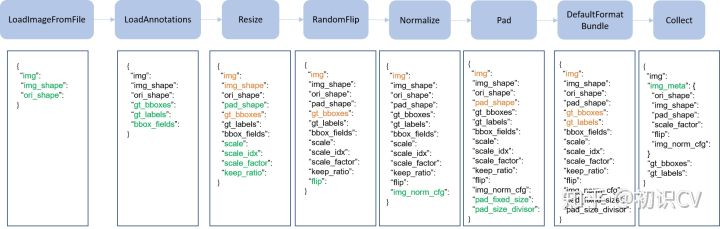